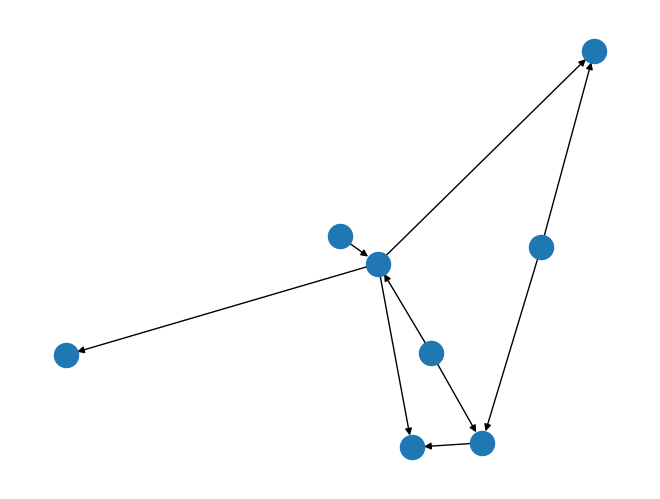

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])
nx.draw(G)
plt.show()

In [76]:
with open('input') as f:
    text = f.read()

In [77]:
example = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
#text = example

In [96]:
exits = {}
edges = []
values = {}
for l in text.strip().split('\n'):
    name = l.split(' ')[1]
    rate = int(l.split('=')[1].split(';')[0])
    try:
        tunnels = l.split('valves ')[1].split(', ')
    except:
        tunnels = [l.split('valve ')[1]]
    #print(name, rate, tunnels)
    values[name] = rate
    exits[name] = tunnels
    for t in tunnels:
        edges.append((name, t))
values

{'TM': 3,
 'BX': 0,
 'GV': 8,
 'OI': 0,
 'OY': 0,
 'EZ': 0,
 'TN': 0,
 'SE': 0,
 'SG': 0,
 'EB': 0,
 'QB': 0,
 'GU': 0,
 'AW': 11,
 'IG': 0,
 'MJ': 0,
 'HX': 0,
 'IK': 0,
 'QZ': 0,
 'CV': 0,
 'ES': 0,
 'NK': 0,
 'SL': 0,
 'RG': 17,
 'ZB': 9,
 'SJ': 0,
 'GF': 19,
 'OU': 10,
 'TL': 0,
 'XG': 18,
 'EK': 20,
 'BV': 0,
 'AA': 0,
 'UO': 23,
 'LI': 0,
 'MI': 0,
 'MP': 0,
 'YQ': 14,
 'AF': 0,
 'SH': 0,
 'FD': 0,
 'KQ': 0,
 'DI': 0,
 'KT': 0,
 'MG': 0,
 'DQ': 0,
 'CE': 21,
 'MK': 0,
 'XL': 0,
 'OX': 0,
 'DT': 5,
 'IH': 0,
 'TP': 0,
 'FQ': 0,
 'CD': 6,
 'XR': 7,
 'VK': 0,
 'WC': 0,
 'TR': 0,
 'NQ': 0}

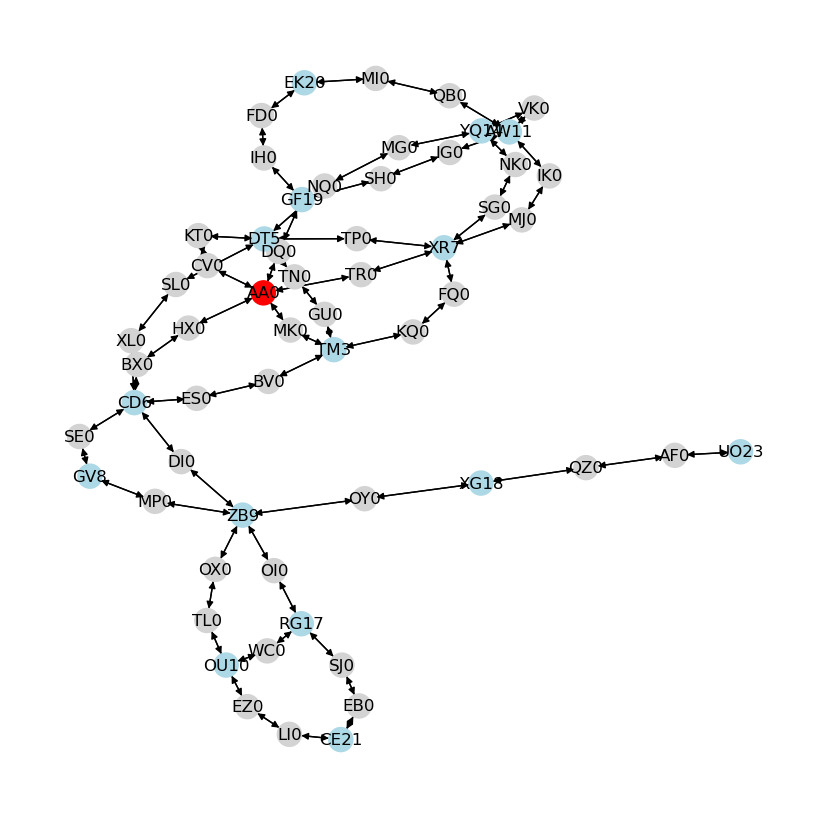

In [194]:
import math
G = nx.DiGraph()
for v in values:
    #print(v, values[v])
    G.add_node(v, color=('lightblue' if values[v] > 0 else 'red' if v=='AA' else 'lightgrey'))
G.add_edges_from(edges)
pos = nx.spring_layout(G,k=0.1)
colors = [node[1]['color'] for node in G.nodes(data=True)]
fig = plt.figure(figsize=(8, 8))
#G.nodes()
nx.draw(G, pos, node_color=colors, with_labels=True, labels={n: n+str(values[n]) for n in G.nodes()})
#nx.draw(G, with_labels=True)
plt.show()

In [98]:
# "Universe at 29/UO ['AA', 'GF', 'EK', 'AW', 'YQ', 'XG'] f 1519 c 1519"

In [212]:
important = dict((k, v) for k,v in values.items() if v > 0)
imp_sorted = sorted(important.items(), key=lambda a: a[1], reverse=True)
imp_sorted

[('UO', 23),
 ('CE', 21),
 ('EK', 20),
 ('GF', 19),
 ('XG', 18),
 ('RG', 17),
 ('YQ', 14),
 ('AW', 11),
 ('OU', 10),
 ('ZB', 9),
 ('GV', 8),
 ('XR', 7),
 ('CD', 6),
 ('DT', 5),
 ('TM', 3)]

In [213]:
import functools
@functools.cache
def bfs(start, end):
    shortest_path = {start: []}
    visited = set()
    current = start
    to_visit = [start]
    while True:
        #if not to_visit:
        current = to_visit.pop(0)
        #print(current)
        if current in visited:
            continue
        visited.add(current)
        for nei in exits[current]:
            if nei == end:
                return shortest_path[current] + [end]
            if not nei in shortest_path:
                shortest_path[nei] = shortest_path[current] + [nei]
                to_visit.append(nei)
                

In [214]:
e = list(important.items())[0][0]
print(e)
bfs('AA', list(important.items())[0][0])

TM


['MK', 'TM']

In [215]:
@functools.cache
def dist(start, end):
    return len(bfs(start, end))

In [216]:
[(dist('AA', x), x, v) for x, v in imp_sorted]

[(10, 'UO', 23),
 (10, 'CE', 21),
 (5, 'EK', 20),
 (2, 'GF', 19),
 (7, 'XG', 18),
 (7, 'RG', 17),
 (5, 'YQ', 14),
 (5, 'AW', 11),
 (8, 'OU', 10),
 (5, 'ZB', 9),
 (5, 'GV', 8),
 (2, 'XR', 7),
 (3, 'CD', 6),
 (3, 'DT', 5),
 (2, 'TM', 3)]

In [181]:
def wishful_sort(curr, rest, turns_left):
    if not rest:
        return rest
    best = max(rest, key=lambda a: values[a] * (turns_left-dist(curr, a)))
    rest = [a for a in rest if a!=best]
    return [best]+wishful_sort(best, rest, turns_left-dist(curr, best))
wishful_sort('AA', important, 26)

['GF',
 'EK',
 'YQ',
 'AW',
 'XR',
 'DT',
 'ZB',
 'XG',
 'CD',
 'TM',
 'GV',
 'OU',
 'RG',
 'CE',
 'UO']

In [257]:
def sim(order):
    turn = 0
    curr = 'AA'
    perturn = 0
    points = 0
    for t in order:
        print(f'moving from {curr} to {t} and turning it on')
        turns_done = dist(curr, t) + 1
        print(f'took {turns_done} to do it')
        points += perturn * turns_done
        #print(f'points now are {points}')
        turn += turns_done
        print('turn', turn)
        if turn >= 30:
            points -= perturn * (turn-30)
            break
        perturn += values[t]
        print(f'pressure released per minute now {perturn}')
        curr = t
    return points
sim([a for a,b in imp_sorted])

moving from AA to UO and turning it on
took 11 to do it
turn 11
pressure released per minute now 23
moving from UO to CE and turning it on
took 11 to do it
turn 22
pressure released per minute now 44
moving from CE to EK and turning it on
took 16 to do it
turn 38


605

In [111]:
sim(wishful_sort('AA', important, 30))

moving from AA to GF and turning it on
took 3 to do it
pressure released per minute now 19
moving from GF to EK and turning it on
took 4 to do it
pressure released per minute now 39
moving from EK to YQ and turning it on
took 6 to do it
pressure released per minute now 53
moving from YQ to AW and turning it on
took 3 to do it
pressure released per minute now 64
moving from AW to XG and turning it on
took 13 to do it
pressure released per minute now 82
moving from XG to UO and turning it on
took 4 to do it


1383

In [136]:
def ceiling(curr, currB, currpoints, perturn, pending, sturn):
    pending = sorted(pending, key=lambda a: values[a], reverse=True)
    for turn in range(26-sturn):
        #print(f'turn {turn+sturn} perturn {perturn}')
        currpoints += perturn
        done = []
        for p in pending:
            if p not in done and min(dist(curr, p), dist(currB, p)) <= turn:
                perturn += values[p]
                done.append(p)
        pending = [p for p in pending if not p in done]

    return currpoints
    #turns = 30-sturn
    #return currpoints+turns*(sum([values[v] for v in pending])+perturn)

In [137]:
def floor(currpoints, perturn, sturn):
    turns = 26-sturn
    return currpoints+perturn*turns

In [138]:
ceiling('AA', 'AA', 0, sum(values[k] for k in important), [], 0)

4966

In [139]:
ceiling('AA', 'AA', 0, 0, important, 0)

3609

In [140]:
class Universe:
    done = []
    pending = []
    curr = None
    path = []
    currB = None
    pathB = []
    perturn = 0
    points = 0
    turn = 0
    
    def __init__(self, other=None):
        if other is not None:
            self.done = list(other.done)
            self.pending = list(other.pending)
            self.curr = other.curr
            self.currB = other.currB
            self.perturn = other.perturn
            self.points = other.points
            self.turn = other.turn
            self.path = list(other.path)
            self.patB = list(other.pathB)
    
    def __str__(self):
        return (f'Universe at {self.turn}/{self.curr}/{self.currB} pathA={self.path} '
                f'pathB={self.pathB} done={str(self.done)} f {self.floor()} c {self.ceiling()}')
    
    def floor(self):
        return floor(self.points, self.perturn, self.turn)
    
    def ceiling(self):
        return ceiling(self.curr, self.currB, self.points, self.perturn, self.pending, self.turn)
    
    def run(self):
        while self.path and self.pathB and self.turn < 26:
            self.curr = self.path.pop(0)
            self.currB = self.pathB.pop(0)
            self.points += self.perturn
            if not self.path and self.curr not in self.done:
                self.perturn += values[self.curr]
                self.done.append(self.curr)
            if not self.pathB and self.currB not in self.done:
                self.perturn += values[self.currB]
                self.done.append(self.currB)
            self.turn += 1
    
    def childrenA(self):
        destinies = wishful_sort(self.curr, self.pending, 30-self.turn)
        for node in destinies:
            u = Universe(self)
            u.path = list(bfs(self.curr, node))
            #print('new path', self.curr, node, u.path)
            if not u.pathB:
                for c in u.childrenB():
                    yield c
            else:
                yield u
        
    
    def childrenB(self):
        destinies = wishful_sort(self.currB, self.pending, 30-self.turn)
        for node in destinies:
            u = Universe(self)
            u.pathB = list(bfs(self.currB, node))
            #print('new pathB', self.currB, node, u.pathB, u.path)
            yield u
    
    def children(self):
        if not self.path:
            for c in self.childrenA():
                yield c
        elif not self.pathB:
            for c in self.childrenB():
                yield c

In [143]:
def simx(order):
    u = Universe()
    u.curr = 'AA'
    u.currB = 'AA'
    u.pending = [k for k in important]
    to_visit = [u]
    best_floor = None
    iters = 0
    #to_visit = [k for k in important]
    #for t in order:
    best = None
    while to_visit:
        u = to_visit.pop(0)
        uf = u.floor()
        if best_floor is None or uf > best_floor:
            best_floor = u.floor()
            best = u
        if u.ceiling() < best_floor:
            print('skipped')
            return 'yay'
            continue
        print(u, best_floor, len(to_visit))
        iters += 1

        for c in u.children():
            c.run()
            if c.ceiling() > best_floor:
                to_visit.append(c)
    print(iters)
    return best
#simx(['DD', 'BB', 'JJ', 'HH', 'EE', 'CC'])
sol = simx(important)
sol

Universe at 0/AA/AA pathA=[] pathB=[] done=[] f 0 c 3609 0 0
Universe at 2/GF/GF pathA=[] pathB=[] done=['GF'] f 456 c 3491 456 224
Universe at 2/GF/GF pathA=[] pathB=['IH', 'FD', 'EK'] done=['GF'] f 456 c 3491 456 448
Universe at 2/GF/XR pathA=[] pathB=['SG', 'NK', 'YQ'] done=['GF'] f 456 c 3551 456 672
Universe at 2/GF/XR pathA=[] pathB=['MJ', 'IK', 'AW'] done=['GF'] f 456 c 3551 456 896
Universe at 2/GF/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OY', 'XG'] done=['GF'] f 456 c 3944 456 1120
Universe at 2/GF/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['GF'] f 456 c 3944 456 1344
Universe at 2/GF/BX pathA=[] pathB=['CD', 'DI', 'ZB'] done=['GF'] f 456 c 3944 456 1568
Universe at 2/GF/TM pathA=[] pathB=[] done=['GF', 'TM'] f 528 c 3810 528 1792
Universe at 2/GF/KT pathA=[] pathB=['DT'] done=['GF'] f 456 c 3644 528 2016
Universe at 2/GF/BX pathA=[] pathB=['CD'] done=['GF'] f 456 c 3944 528 2240
Universe at 2/GF/BX pathA=[] pathB=['CD', 'SE', 'GV'] done=['GF'] f 456

Universe at 2/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OI', 'RG', 'SJ', 'EB', 'CE'] done=['TM'] f 72 c 3413 714 17781
Universe at 2/KT/GF pathA=['DT'] pathB=[] done=['GF'] f 456 c 3644 714 18005
Universe at 3/DT/IH pathA=[] pathB=['FD', 'EK'] done=['DT'] f 115 c 3271 714 18019
Universe at 3/DT/SG pathA=[] pathB=['NK', 'YQ'] done=['DT'] f 115 c 3116 714 18243
Universe at 3/DT/MJ pathA=[] pathB=['IK', 'AW'] done=['DT'] f 115 c 3164 714 18467
Universe at 3/DT/CD pathA=[] pathB=['DI', 'ZB', 'OY', 'XG'] done=['DT'] f 115 c 3388 714 18691
Universe at 3/DT/CD pathA=[] pathB=['DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['DT'] f 115 c 3388 714 18915
Universe at 3/DT/CD pathA=[] pathB=['DI', 'ZB'] done=['DT'] f 115 c 3388 714 19139
Universe at 2/KT/TM pathA=['DT'] pathB=[] done=['TM'] f 72 c 3227 714 19363
Universe at 3/DT/DT pathA=[] pathB=[] done=['DT'] f 115 c 3064 714 19377
Universe at 3/DT/CD pathA=[] pathB=[] done=['DT', 'CD'] f 253 c 3526 714 19601
Universe at 3/DT/CD pathA=[] pathB=['

Universe at 4/GF/FD pathA=[] pathB=['EK'] done=['GF'] f 456 c 3149 1107 34871
Universe at 4/GF/GF pathA=[] pathB=[] done=['GF'] f 456 c 3109 1107 35095
Universe at 4/GF/IG pathA=[] pathB=['AW', 'VK', 'YQ'] done=['GF'] f 456 c 3159 1107 35317
Universe at 4/GF/IG pathA=[] pathB=['AW'] done=['GF'] f 456 c 3159 1107 35541
Universe at 4/GF/AA pathA=[] pathB=['TR', 'XR'] done=['GF'] f 456 c 3363 1107 35765
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'DI', 'ZB', 'OY', 'XG'] done=['GF'] f 456 c 3363 1107 35989
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'DI', 'ZB'] done=['GF'] f 456 c 3363 1107 36213
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD'] done=['GF'] f 456 c 3363 1107 36437
Universe at 4/GF/AA pathA=[] pathB=['MK', 'TM'] done=['GF'] f 456 c 3363 1107 36661
Universe at 4/GF/AA pathA=[] pathB=['CV', 'KT', 'DT'] done=['GF'] f 456 c 3363 1107 36885
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'SE', 'GV'] done=['GF'] f 456 c 3363 1107 37109
Universe at 4/

Universe at 7/CD/CD pathA=[] pathB=['DI', 'ZB', 'OI', 'RG', 'SJ', 'EB', 'CE'] done=['GF', 'CD'] f 570 c 2978 1107 50999
Universe at 7/CD/CD pathA=[] pathB=['DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['GF', 'CD'] f 570 c 2978 1107 51223
Universe at 5/MK/EK pathA=['TM'] pathB=[] done=['GF', 'EK'] f 876 c 3472 1107 51447
Universe at 4/AA/GF pathA=['MK', 'TM'] pathB=[] done=['GF'] f 456 c 3363 1107 51461
Universe at 6/TM/VK pathA=[] pathB=['YQ'] done=['GF', 'TM'] f 516 c 3054 1107 51475
Universe at 5/MK/AW pathA=['TM'] pathB=[] done=['GF', 'AW'] f 687 c 3316 1107 51699
Universe at 6/TM/XR pathA=[] pathB=[] done=['GF', 'TM', 'XR'] f 656 c 3116 1107 51713
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OY', 'XG'] done=['GF', 'TM'] f 516 c 3093 1107 51937
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB'] done=['GF', 'TM'] f 516 c 3093 1107 52161
Universe at 6/TM/BX pathA=[] pathB=['CD'] done=['GF', 'TM'] f 516 c 3093 1107 52385
Universe at 6/TM/TM pathA=[] pathB=[] done=['GF', 

Universe at 5/EK/CV pathA=[] pathB=['KT', 'DT'] done=['GF', 'EK'] f 876 c 3476 1107 62373
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'SE', 'GV'] done=['GF', 'EK'] f 876 c 3690 1107 62597
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB', 'OX', 'TL', 'OU'] done=['GF', 'EK'] f 876 c 3690 1107 62821
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB', 'OI', 'RG'] done=['GF', 'EK'] f 876 c 3690 1107 63045
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB', 'OI', 'RG', 'SJ', 'EB', 'CE'] done=['GF', 'EK'] f 876 c 3690 1107 63269
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['GF', 'EK'] f 876 c 3690 1107 63493
Universe at 4/GF/FD pathA=[] pathB=['EK'] done=['GF'] f 456 c 3149 1107 63717
Universe at 4/GF/GF pathA=[] pathB=[] done=['GF'] f 456 c 3109 1107 63941
Universe at 4/GF/IG pathA=[] pathB=['AW', 'VK', 'YQ'] done=['GF'] f 456 c 3159 1107 64163
Universe at 4/GF/IG pathA=[] pathB=['AW'] done=['GF'] f 456 c 3159 1

Universe at 7/CD/CD pathA=[] pathB=[] done=['GF', 'CD'] f 570 c 2978 1107 78711
Universe at 6/BX/TM pathA=['CD'] pathB=[] done=['GF', 'TM'] f 516 c 3093 1107 78935
Universe at 7/CD/DT pathA=[] pathB=[] done=['GF', 'CD', 'DT'] f 665 c 3174 1107 78949
Universe at 7/CD/CD pathA=[] pathB=['SE', 'GV'] done=['GF', 'CD'] f 570 c 2978 1107 79173
Universe at 7/CD/CD pathA=[] pathB=['DI', 'ZB', 'OX', 'TL', 'OU'] done=['GF', 'CD'] f 570 c 2978 1107 79397
Universe at 7/CD/CD pathA=[] pathB=['DI', 'ZB', 'OI', 'RG'] done=['GF', 'CD'] f 570 c 2978 1107 79621
Universe at 7/CD/CD pathA=[] pathB=['DI', 'ZB', 'OI', 'RG', 'SJ', 'EB', 'CE'] done=['GF', 'CD'] f 570 c 2978 1107 79845
Universe at 7/CD/CD pathA=[] pathB=['DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['GF', 'CD'] f 570 c 2978 1107 80069
Universe at 5/MK/EK pathA=['TM'] pathB=[] done=['GF', 'EK'] f 876 c 3472 1107 80293
Universe at 4/AA/GF pathA=['MK', 'TM'] pathB=[] done=['GF'] f 456 c 3363 1107 80307
Universe at 6/TM/VK pathA=[] pathB=['YQ'] 

Universe at 5/EK/AW pathA=[] pathB=['QB', 'MI', 'EK'] done=['GF', 'EK'] f 876 c 3057 1107 89637
Universe at 5/EK/YQ pathA=[] pathB=[] done=['GF', 'EK', 'YQ'] f 1170 c 3585 1170 89861
Universe at 5/EK/AW pathA=[] pathB=[] done=['GF', 'EK', 'AW'] f 1107 c 3288 1170 90085
Universe at 4/FD/XR pathA=['EK'] pathB=[] done=['GF', 'XR'] f 610 c 3363 1170 90309
Universe at 4/FD/DT pathA=['EK'] pathB=[] done=['GF', 'DT'] f 566 c 3532 1170 90323
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB'] done=['GF', 'EK'] f 876 c 3690 1170 90337
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB', 'OY', 'XG'] done=['GF', 'EK'] f 876 c 3690 1170 90561
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD'] done=['GF', 'EK'] f 876 c 3690 1170 90785
Universe at 5/EK/TM pathA=[] pathB=[] done=['GF', 'EK', 'TM'] f 939 c 3649 1170 91009
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'SE', 'GV'] done=['GF', 'EK'] f 876 c 3690 1170 91233
Universe at 5/EK/HX pathA=[] pathB=['BX', 'CD', 'DI', 'ZB', 'OX', 'T

Universe at 5/MK/TM pathA=['TM'] pathB=[] done=['GF', 'TM'] f 519 c 3105 1170 108964
Universe at 6/TM/BX pathA=[] pathB=['CD', 'SE', 'GV'] done=['GF', 'TM'] f 516 c 3093 1170 108978
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OX', 'TL', 'OU'] done=['GF', 'TM'] f 516 c 3093 1170 109202
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OI', 'RG'] done=['GF', 'TM'] f 516 c 3093 1170 109426
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OI', 'RG', 'SJ', 'EB', 'CE'] done=['GF', 'TM'] f 516 c 3093 1170 109650
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['GF', 'TM'] f 516 c 3093 1170 109874
Universe at 6/KT/GF pathA=['DT'] pathB=[] done=['GF'] f 456 c 2880 1170 110098
Universe at 7/DT/MI pathA=[] pathB=['EK'] done=['GF', 'DT'] f 551 c 2928 1170 110112
Universe at 5/CV/YQ pathA=['KT', 'DT'] pathB=[] done=['GF', 'YQ'] f 750 c 3343 1170 110336
Universe at 5/CV/AW pathA=['KT', 'DT'] pathB=[] done=['GF', 'AW'] f 687 c 3320 1170 1

Universe at 4/GF/IK pathA=[] pathB=['AW', 'QB', 'MI', 'EK'] done=['GF'] f 456 c 3178 1170 119243
Universe at 4/GF/NK pathA=[] pathB=['YQ'] done=['GF'] f 456 c 3184 1170 119467
Universe at 4/GF/IK pathA=[] pathB=['AW'] done=['GF'] f 456 c 3178 1170 119691
Universe at 4/GF/XR pathA=[] pathB=[] done=['GF', 'XR'] f 610 c 3323 1170 119915
Universe at 4/GF/DT pathA=[] pathB=[] done=['GF', 'DT'] f 566 c 3503 1170 120139
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'DI', 'ZB'] done=['GF'] f 456 c 3363 1170 120363
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'DI', 'ZB', 'OY', 'XG'] done=['GF'] f 456 c 3363 1170 120587
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD'] done=['GF'] f 456 c 3363 1170 120811
Universe at 4/GF/KQ pathA=[] pathB=['TM'] done=['GF'] f 456 c 3249 1170 121035
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'SE', 'GV'] done=['GF'] f 456 c 3363 1170 121259
Universe at 4/GF/AA pathA=[] pathB=['HX', 'BX', 'CD', 'DI', 'ZB', 'OX', 'TL', 'OU'] done=['G

Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OX', 'TL', 'OU'] done=['GF', 'TM'] f 516 c 3093 1170 135868
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OI', 'RG'] done=['GF', 'TM'] f 516 c 3093 1170 136092
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OI', 'RG', 'SJ', 'EB', 'CE'] done=['GF', 'TM'] f 516 c 3093 1170 136316
Universe at 6/TM/BX pathA=[] pathB=['CD', 'DI', 'ZB', 'OY', 'XG', 'QZ', 'AF', 'UO'] done=['GF', 'TM'] f 516 c 3093 1170 136540
Universe at 6/KT/GF pathA=['DT'] pathB=[] done=['GF'] f 456 c 2880 1170 136764
Universe at 7/DT/MI pathA=[] pathB=['EK'] done=['GF', 'DT'] f 551 c 2928 1170 136778
Universe at 5/CV/YQ pathA=['KT', 'DT'] pathB=[] done=['GF', 'YQ'] f 750 c 3343 1170 137002
Universe at 5/CV/AW pathA=['KT', 'DT'] pathB=[] done=['GF', 'AW'] f 687 c 3320 1170 137016
Universe at 4/AA/XR pathA=['CV', 'KT', 'DT'] pathB=[] done=['GF', 'XR'] f 610 c 3510 1170 137030
Universe at 4/AA/DT pathA=['CV', 'KT', 'DT'] pathB=[] done=['GF', 'DT'] f 566 c

Universe at 3/DQ/CD pathA=['GF'] pathB=[] done=['GF', 'CD'] f 594 c 3980 1170 147465
Universe at 4/GF/ES pathA=[] pathB=['BV', 'TM'] done=['GF'] f 456 c 3568 1170 147479
Universe at 4/GF/XL pathA=[] pathB=['SL', 'DT'] done=['GF'] f 456 c 3572 1170 147703
Universe at 4/GF/AA pathA=[] pathB=['TR', 'XR'] done=['GF'] f 456 c 3363 1170 147927
Universe at 4/GF/AA pathA=[] pathB=['TR', 'XR', 'MJ', 'IK', 'AW'] done=['GF'] f 456 c 3363 1170 148151
Universe at 4/GF/XL pathA=[] pathB=['SL', 'DT', 'NQ', 'MG', 'YQ'] done=['GF'] f 456 c 3572 1170 148375
Universe at 4/GF/AA pathA=[] pathB=['DQ', 'GF'] done=['GF'] f 456 c 3363 1170 148599
Universe at 4/GF/AA pathA=[] pathB=['DQ', 'GF', 'IH', 'FD', 'EK'] done=['GF'] f 456 c 3363 1170 148823
Universe at 7/YQ/XG pathA=[] pathB=['QZ', 'AF', 'UO'] done=['GF', 'YQ'] f 722 c 3417 1170 149047
Universe at 7/YQ/XG pathA=[] pathB=[] done=['GF', 'YQ', 'XG'] f 1064 c 3759 1170 149271
Universe at 7/YQ/RG pathA=[] pathB=[] done=['GF', 'YQ', 'RG'] f 1045 c 3760 1170 

KeyboardInterrupt: 

In [47]:
str(sol)

"Universe at 28/XG [('AA', 0), ('GF', 19), ('EK', 20), ('AW', 11), ('YQ', 14), ('DT', 5), ('CD', 6), ('ZB', 9)] f 1595 c 1595"

In [185]:
imp_sorted = wishful_sort('AA', important, 26)
imp_sorted

['GF',
 'EK',
 'YQ',
 'AW',
 'XR',
 'DT',
 'ZB',
 'XG',
 'CD',
 'TM',
 'GV',
 'OU',
 'RG',
 'CE',
 'UO']

In [197]:
class Elephant:
    curr = None
    path = None # immediate path till first target
    universe = None
    
    def turn(self):
        if self.path:
            self.curr = self.path.pop(0)
            return False
        else:
            self.universe.open(self.curr)
            #self.path = list(bfs(self.curr, self.targets.pop(0)))
            return True
    
    def __init__(self, other=None):
        if other:
            self.curr = other.curr
            self.path = list(other.path)

In [198]:
class Universe:
    a = None
    b = None
    done = None
    turn = 0
    points = 0
    def __str__(self):
        return (f'Universe<t{self.turn}, d{self.done}, p{self.points}, '
                f'a{self.a.curr} {self.a.path[-1:]}, b{self.b.curr} {self.b.path[-1:]}>')
    
    def __init__(self, other=None):
        if other:
            self.a = Elephant(other.a)
            self.b = Elephant(other.b)
            self.a.universe = self
            self.b.universe = self
            self.done = list(other.done)
            self.turn = other.turn
            self.points = other.points
        else:
            self.a = Elephant()
            self.b = Elephant()
            self.a.curr = "AA"
            self.b.curr = "AA"
            self.a.universe = self
            self.b.universe = self
            self.done = []
    
    def perturn(self):
        return sum(values[v] for v in self.done)
    
    def floor(self):
        return floor(self.points, self.perturn(), self.turn)
    
    def pending(self):
        return [i for i in important if not i in self.done]
    
    def ceiling(self):
        return ceiling(self.a.curr, self.b.curr, self.points, self.perturn(), self.pending(), self.turn)
    
    def open(self, target):
        if not target in self.done:
            self.done.append(target)
    
    def run(self):
        a_done = self.a.turn()
        b_done = self.b.turn()
        self.turn += 1
        #print('runing turn!')
        #print('A is at', self.a.curr)
        #print('B is at', self.b.curr)
        if self.turn >= 26:
            return []
        self.points += self.perturn()
        if not a_done and not b_done:
            return self.run()
        child_universes = []
        if a_done and b_done:
            imp = [i for i in imp_sorted if i not in self.done]
            for t in imp:
                for t2 in imp:
                    if t!=t2:
                        c = Universe(self)
                        c.a.path = list(bfs(self.a.curr, t))
                        c.b.path = list(bfs(self.b.curr, t))
                        child_universes.append(c)
        elif a_done:
            imp = [i for i in imp_sorted if i not in self.done]
            for t in imp:
                c = Universe(self)
                c.a.path = list(bfs(self.a.curr, t))
                child_universes.append(c)
        elif b_done:
            imp = [i for i in imp_sorted if i not in self.done]
            for t in imp:
                c = Universe(self)
                c.b.path = list(bfs(self.b.curr, t))
                child_universes.append(c)
        return child_universes

In [199]:
best_floor = None
best = None
iters = 0
# initial universes
to_visit = []
visited = set()
for t in imp_sorted:
    for t2 in imp_sorted:
        if t!= t2:
            u = Universe()
            u.a.path = list(bfs('AA', t))
            u.b.path = list(bfs('AA', t2))
            to_visit.append(u)
print("initial universes:", len(to_visit))
while to_visit:
    u = to_visit.pop(0)
    su = str(u)
    if su in visited:
        continue
    visited.add(su)
    print('universe', u, u.floor(), u.ceiling())
    print(len(to_visit))
    uf = u.floor()
    if not best_floor or uf > best_floor:
        best_floor = uf
        best = u
    # run it as far as it will go
    children = u.run()
    visited.add(str(u))
    if u.turn == 26:
        print('finished', u)
    for c in children:
        if str(c) not in visited and c.ceiling() > best_floor:
            to_visit.append(c)

initial universes: 210
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['EK']> 0 3609
209
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['YQ']> 0 3609
222
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['AW']> 0 3609
235
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['XR']> 0 3609
248
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['DT']> 0 3609
403
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['ZB']> 0 3609
416
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['XG']> 0 3609
429
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['CD']> 0 3609
442
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['TM']> 0 3609
455
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['GV']> 0 3609
610
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['OU']> 0 3609
623
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['RG']> 0 3609
636
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['CE']> 0 3609
649
universe Universe<t0, d[], p0, aAA ['GF'], bAA ['UO']> 0 3609
662
universe Universe<t0, d[], p0, aAA ['EK'], bAA ['GF']

universe Universe<t0, d[], p0, aAA ['UO'], bAA ['XR']> 0 3609
7211
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['DT']> 0 3609
7224
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['ZB']> 0 3609
7237
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['XG']> 0 3609
7250
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['CD']> 0 3609
7263
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['TM']> 0 3609
7276
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['GV']> 0 3609
7289
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['OU']> 0 3609
7302
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['RG']> 0 3609
7315
universe Universe<t0, d[], p0, aAA ['UO'], bAA ['CE']> 0 3609
7328
universe Universe<t3, d['GF'], p19, aGF ['EK'], bIH ['EK']> 456 2940
7483
universe Universe<t3, d['GF'], p19, aGF ['YQ'], bIH ['EK']> 456 2940
7495
universe Universe<t3, d['GF'], p19, aGF ['AW'], bIH ['EK']> 456 2940
7507
universe Universe<t3, d['GF'], p19, aGF ['XR'], bIH ['EK']> 456 2940
7519
universe Universe<t3, d['GF'], p19

universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['XR']> 456 2940
11924
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['DT']> 456 2940
11936
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['ZB']> 456 2940
11948
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['XG']> 456 2940
11960
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['CD']> 456 2940
11972
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['TM']> 456 2940
11984
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['GV']> 456 2940
11996
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['OU']> 456 2940
12008
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['RG']> 456 2940
12020
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['CE']> 456 2940
12032
universe Universe<t3, d['GF'], p19, aIH ['EK'], bGF ['UO']> 456 2940
12044
universe Universe<t6, d['EK', 'YQ'], p34, aEK ['GF'], bYQ ['GF']> 714 2360
12056
universe Universe<t6, d['EK', 'YQ'], p34, aEK ['AW'], bYQ ['AW']> 714 2360
12056
universe Univ

universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['ZB']> 168 2848
15354
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['XG']> 168 2848
15366
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['CD']> 168 2848
15378
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['TM']> 168 2848
15390
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['GV']> 168 2848
15402
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['OU']> 168 2848
15414
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['RG']> 168 2848
15426
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['CE']> 168 2848
15438
universe Universe<t3, d['XR'], p7, aSG ['YQ'], bXR ['UO']> 168 2848
15450
universe Universe<t4, d['DT'], p5, aNK ['YQ'], bDT ['GF']> 115 2868
15462
universe Universe<t4, d['DT'], p5, aNK ['YQ'], bDT ['EK']> 115 2868
15474
universe Universe<t4, d['DT'], p5, aNK ['YQ'], bDT ['YQ']> 115 2868
15486
universe Universe<t4, d['DT'], p5, aNK ['YQ'], bDT ['AW']> 115 2868
15498
universe Universe<t4, d['DT'], p5, aNK

universe Universe<t6, d['AW'], p11, aAW ['OU'], bOY ['UO']> 231 3064
20354
universe Universe<t6, d['AW'], p11, aAW ['RG'], bOY ['UO']> 231 3064
20366
universe Universe<t6, d['AW'], p11, aAW ['CE'], bOY ['UO']> 231 3064
20378
universe Universe<t6, d['AW'], p11, aAW ['UO'], bOY ['UO']> 231 3064
20390
universe Universe<t3, d['XR', 'GF'], p26, aXR ['EK'], bGF ['EK']> 624 3008
20402
universe Universe<t3, d['XR', 'GF'], p26, aXR ['YQ'], bGF ['YQ']> 624 3008
20402
universe Universe<t3, d['XR', 'GF'], p26, aXR ['AW'], bGF ['AW']> 624 3008
20402
universe Universe<t3, d['XR', 'GF'], p26, aXR ['DT'], bGF ['DT']> 624 3008
20522
universe Universe<t3, d['XR', 'GF'], p26, aXR ['ZB'], bGF ['ZB']> 624 3008
20522
universe Universe<t3, d['XR', 'GF'], p26, aXR ['XG'], bGF ['XG']> 624 3008
20642
universe Universe<t3, d['XR', 'GF'], p26, aXR ['CD'], bGF ['CD']> 624 3008
20762
universe Universe<t3, d['XR', 'GF'], p26, aXR ['TM'], bGF ['TM']> 624 3008
20882
universe Universe<t3, d['XR', 'GF'], p26, aXR ['GV']

universe Universe<t3, d['XR'], p7, aXR ['OU'], bCD ['UO']> 168 3382
24997
universe Universe<t3, d['XR'], p7, aXR ['RG'], bCD ['UO']> 168 3382
25009
universe Universe<t3, d['XR'], p7, aXR ['CE'], bCD ['UO']> 168 3382
25021
universe Universe<t3, d['XR'], p7, aXR ['UO'], bCD ['UO']> 168 3382
25033
universe Universe<t3, d['GF'], p19, aDT [], bGF ['EK']> 456 3204
25045
universe Universe<t3, d['GF'], p19, aDT [], bGF ['YQ']> 456 3204
25057
universe Universe<t3, d['GF'], p19, aDT [], bGF ['AW']> 456 3204
25069
universe Universe<t3, d['GF'], p19, aDT [], bGF ['XR']> 456 3204
25081
universe Universe<t3, d['GF'], p19, aDT [], bGF ['DT']> 456 3204
25093
universe Universe<t3, d['GF'], p19, aDT [], bGF ['ZB']> 456 3204
25105
universe Universe<t3, d['GF'], p19, aDT [], bGF ['XG']> 456 3204
25117
universe Universe<t3, d['GF'], p19, aDT [], bGF ['CD']> 456 3204
25129
universe Universe<t3, d['GF'], p19, aDT [], bGF ['TM']> 456 3204
25141
universe Universe<t3, d['GF'], p19, aDT [], bGF ['GV']> 456 3204


universe Universe<t6, d['ZB', 'GV'], p17, aZB ['EK'], bGV ['EK']> 357 2687
29670
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['YQ'], bGV ['YQ']> 357 2687
29790
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['AW'], bGV ['AW']> 357 2687
29910
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['XR'], bGV ['XR']> 357 2687
30030
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['DT'], bGV ['DT']> 357 2687
30150
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['XG'], bGV ['XG']> 357 2687
30270
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['CD'], bGV ['CD']> 357 2687
30270
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['TM'], bGV ['TM']> 357 2687
30390
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['OU'], bGV ['OU']> 357 2687
30510
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['RG'], bGV ['RG']> 357 2687
30510
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['CE'], bGV ['CE']> 357 2687
30510
universe Universe<t6, d['ZB', 'GV'], p17, aZB ['UO'], bGV ['UO']> 357 2687
30510
universe Universe<t6, d['ZB'

universe Universe<t8, d['XG', 'RG'], p35, aXG ['EK'], bRG ['EK']> 665 2289
34696
universe Universe<t8, d['XG', 'RG'], p35, aXG ['YQ'], bRG ['YQ']> 665 2289
34816
universe Universe<t8, d['XG', 'RG'], p35, aXG ['AW'], bRG ['AW']> 665 2289
34936
universe Universe<t8, d['XG', 'RG'], p35, aXG ['XR'], bRG ['XR']> 665 2289
35056
universe Universe<t8, d['XG', 'RG'], p35, aXG ['DT'], bRG ['DT']> 665 2289
35176
universe Universe<t8, d['XG', 'RG'], p35, aXG ['ZB'], bRG ['ZB']> 665 2289
35296
universe Universe<t8, d['XG', 'RG'], p35, aXG ['CD'], bRG ['CD']> 665 2289
35416
universe Universe<t8, d['XG', 'RG'], p35, aXG ['TM'], bRG ['TM']> 665 2289
35536
universe Universe<t8, d['XG', 'RG'], p35, aXG ['GV'], bRG ['GV']> 665 2289
35656
universe Universe<t8, d['XG', 'RG'], p35, aXG ['OU'], bRG ['OU']> 665 2289
35776
universe Universe<t8, d['XG', 'RG'], p35, aXG ['CE'], bRG ['CE']> 665 2289
35776
universe Universe<t8, d['XG', 'RG'], p35, aXG ['UO'], bRG ['UO']> 665 2289
35776
universe Universe<t8, d['XG'

universe Universe<t4, d['CD', 'DT'], p11, aCD ['YQ'], bDT ['YQ']> 253 3126
37430
universe Universe<t4, d['CD', 'DT'], p11, aCD ['AW'], bDT ['AW']> 253 3126
37430
universe Universe<t4, d['CD', 'DT'], p11, aCD ['XR'], bDT ['XR']> 253 3126
37430
universe Universe<t4, d['CD', 'DT'], p11, aCD ['ZB'], bDT ['ZB']> 253 3126
37430
universe Universe<t4, d['CD', 'DT'], p11, aCD ['XG'], bDT ['XG']> 253 3126
37430
universe Universe<t4, d['CD', 'DT'], p11, aCD ['TM'], bDT ['TM']> 253 3126
37430
universe Universe<t4, d['CD', 'DT'], p11, aCD ['GV'], bDT ['GV']> 253 3126
37550
universe Universe<t4, d['CD', 'DT'], p11, aCD ['OU'], bDT ['OU']> 253 3126
37550
universe Universe<t4, d['CD', 'DT'], p11, aCD ['RG'], bDT ['RG']> 253 3126
37550
universe Universe<t4, d['CD', 'DT'], p11, aCD ['CE'], bDT ['CE']> 253 3126
37550
universe Universe<t4, d['CD', 'DT'], p11, aCD ['UO'], bDT ['UO']> 253 3126
37550
universe Universe<t4, d['CD'], p6, aCD ['GF'], bDI ['ZB']> 138 3103
37550
universe Universe<t4, d['CD'], p6, 

universe Universe<t3, d['TM'], p3, aTM ['OU'], bCD ['OU']> 72 3262
41781
universe Universe<t3, d['TM'], p3, aTM ['RG'], bCD ['OU']> 72 3262
41793
universe Universe<t3, d['TM'], p3, aTM ['CE'], bCD ['OU']> 72 3262
41805
universe Universe<t3, d['TM'], p3, aTM ['UO'], bCD ['OU']> 72 3262
41817
universe Universe<t3, d['TM'], p3, aTM ['GF'], bCD ['RG']> 72 3262
41829
universe Universe<t3, d['TM'], p3, aTM ['EK'], bCD ['RG']> 72 3262
41960
universe Universe<t3, d['TM'], p3, aTM ['YQ'], bCD ['RG']> 72 3262
41972
universe Universe<t3, d['TM'], p3, aTM ['AW'], bCD ['RG']> 72 3262
41984
universe Universe<t3, d['TM'], p3, aTM ['XR'], bCD ['RG']> 72 3262
41996
universe Universe<t3, d['TM'], p3, aTM ['DT'], bCD ['RG']> 72 3262
42008
universe Universe<t3, d['TM'], p3, aTM ['ZB'], bCD ['RG']> 72 3262
42020
universe Universe<t3, d['TM'], p3, aTM ['XG'], bCD ['RG']> 72 3262
42032
universe Universe<t3, d['TM'], p3, aTM ['CD'], bCD ['RG']> 72 3262
42044
universe Universe<t3, d['TM'], p3, aTM ['GV'], bCD 

universe Universe<t6, d['GV'], p8, aGV ['CD'], bOI ['CE']> 168 2657
46162
universe Universe<t6, d['GV'], p8, aGV ['TM'], bOI ['CE']> 168 2657
46174
universe Universe<t6, d['GV'], p8, aGV ['OU'], bOI ['CE']> 168 2657
46186
universe Universe<t6, d['GV'], p8, aGV ['RG'], bOI ['CE']> 168 2657
46198
universe Universe<t6, d['GV'], p8, aGV ['CE'], bOI ['CE']> 168 2657
46329
universe Universe<t6, d['GV'], p8, aGV ['UO'], bOI ['CE']> 168 2657
46341
universe Universe<t6, d['GV'], p8, aGV ['GF'], bOY ['UO']> 168 2653
46353
universe Universe<t6, d['GV'], p8, aGV ['EK'], bOY ['UO']> 168 2653
46365
universe Universe<t6, d['GV'], p8, aGV ['YQ'], bOY ['UO']> 168 2653
46377
universe Universe<t6, d['GV'], p8, aGV ['AW'], bOY ['UO']> 168 2653
46389
universe Universe<t6, d['GV'], p8, aGV ['XR'], bOY ['UO']> 168 2653
46401
universe Universe<t6, d['GV'], p8, aGV ['DT'], bOY ['UO']> 168 2653
46413
universe Universe<t6, d['GV'], p8, aGV ['ZB'], bOY ['UO']> 168 2653
46425
universe Universe<t6, d['GV'], p8, aGV

universe Universe<t9, d['OU'], p10, aOU ['RG'], bEB ['CE']> 180 1769
50811
universe Universe<t9, d['OU'], p10, aOU ['CE'], bEB ['CE']> 180 1769
50823
universe Universe<t9, d['OU'], p10, aOU ['UO'], bEB ['CE']> 180 1769
50835
universe Universe<t9, d['OU'], p10, aOU ['GF'], bAF ['UO']> 180 1942
50847
universe Universe<t9, d['OU'], p10, aOU ['EK'], bAF ['UO']> 180 1942
50859
universe Universe<t9, d['OU'], p10, aOU ['YQ'], bAF ['UO']> 180 1942
50871
universe Universe<t9, d['OU'], p10, aOU ['AW'], bAF ['UO']> 180 1942
50883
universe Universe<t9, d['OU'], p10, aOU ['XR'], bAF ['UO']> 180 1942
50895
universe Universe<t9, d['OU'], p10, aOU ['DT'], bAF ['UO']> 180 1942
50907
universe Universe<t9, d['OU'], p10, aOU ['ZB'], bAF ['UO']> 180 1942
50919
universe Universe<t9, d['OU'], p10, aOU ['XG'], bAF ['UO']> 180 1942
50931
universe Universe<t9, d['OU'], p10, aOU ['CD'], bAF ['UO']> 180 1942
50943
universe Universe<t9, d['OU'], p10, aOU ['TM'], bAF ['UO']> 180 1942
50955
universe Universe<t9, d['

universe Universe<t8, d['RG'], p17, aRG ['GV'], bQZ ['UO']> 323 2258
55777
universe Universe<t8, d['RG'], p17, aRG ['OU'], bQZ ['UO']> 323 2258
55789
universe Universe<t8, d['RG'], p17, aRG ['CE'], bQZ ['UO']> 323 2258
55920
universe Universe<t8, d['RG'], p17, aRG ['UO'], bQZ ['UO']> 323 2258
55932
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['EK']> 456 3481
55944
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['YQ']> 456 3481
55956
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['AW']> 456 3481
55968
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['XR']> 456 3481
55980
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['DT']> 456 3481
55992
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['ZB']> 456 3481
56004
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['XG']> 456 3481
56135
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['CD']> 456 3481
56147
universe Universe<t3, d['GF'], p19, aCD ['CE'], bGF ['TM']> 456 3481
56159
universe Universe<t3, d['

universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['XR']> 420 3041
61053
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['DT']> 420 3041
61065
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['ZB']> 420 3041
61077
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['XG']> 420 3041
61089
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['CD']> 420 3041
61101
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['TM']> 420 3041
61113
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['GV']> 420 3041
61125
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['OU']> 420 3041
61137
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['RG']> 420 3041
61149
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['CE']> 420 3041
61161
universe Universe<t6, d['EK'], p20, aOY ['UO'], bEK ['UO']> 420 3041
61173
universe Universe<t6, d['YQ'], p14, aOY ['UO'], bYQ ['GF']> 294 3008
61185
universe Universe<t6, d['YQ'], p14, aOY ['UO'], bYQ ['EK']> 294 3008
61197
universe Universe<t6, d['

universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['AW']> 876 2855
66017
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['XR']> 876 2855
66028
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['DT']> 876 2855
66039
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['ZB']> 876 2855
66050
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['XG']> 876 2855
66061
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['CD']> 876 2855
66072
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['TM']> 876 2855
66083
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['GV']> 876 2855
66094
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['OU']> 876 2855
66105
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['RG']> 876 2855
66116
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['CE']> 876 2855
66127
universe Universe<t6, d['GF', 'EK'], p96, aHX ['ZB'], bEK ['UO']> 876 2855
66138
universe Universe<t6, d['GF'

universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['CD']> 750 2829
69178
universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['TM']> 750 2829
69189
universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['GV']> 750 2829
69200
universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['OU']> 750 2829
69211
universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['RG']> 750 2829
69222
universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['CE']> 750 2829
69233
universe Universe<t6, d['GF', 'YQ'], p90, aHX ['CD'], bYQ ['UO']> 750 2829
69244
universe Universe<t6, d['GF', 'YQ'], p90, aMK ['TM'], bYQ ['EK']> 750 2611
69255
universe Universe<t6, d['GF', 'YQ'], p90, aMK ['TM'], bYQ ['AW']> 750 2611
69266
universe Universe<t6, d['GF', 'YQ'], p90, aMK ['TM'], bYQ ['XR']> 750 2611
69277
universe Universe<t6, d['GF', 'YQ'], p90, aMK ['TM'], bYQ ['DT']> 750 2611
69288
universe Universe<t6, d['GF', 'YQ'], p90, aMK ['TM'], bYQ ['ZB']> 750 2611
69299
universe Universe<t6, d['GF'

universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['YQ'], bZB ['YQ']> 768 2142
74066
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['AW'], bZB ['AW']> 768 2142
74055
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['DT'], bZB ['DT']> 768 2142
74044
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['XG'], bZB ['XG']> 768 2142
74143
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['CD'], bZB ['CD']> 768 2142
74242
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['TM'], bZB ['TM']> 768 2142
74341
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['GV'], bZB ['GV']> 768 2142
74330
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['OU'], bZB ['OU']> 768 2142
74429
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['RG'], bZB ['RG']> 768 2142
74528
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['CE'], bZB ['CE']> 768 2142
74627
universe Universe<t11, d['GF', 'XR', 'ZB'], p243, aZB ['UO'], bZB ['UO']> 768 2142
74726
universe Universe<t13

universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['YQ']> 645 3098
81847
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['AW']> 645 3098
81858
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['XR']> 645 3098
81869
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['DT']> 645 3098
81880
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['XG']> 645 3098
81891
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['CD']> 645 3098
82000
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['TM']> 645 3098
82109
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['GV']> 645 3098
82120
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['OU']> 645 3098
82229
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['RG']> 645 3098
82240
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['CE']> 645 3098
82349
universe Universe<t6, d['GF', 'ZB'], p85, aCV ['DT'], bZB ['UO']> 645 3098
82360
universe Universe<t6, d['GF'

universe Universe<t8, d['GF', 'XG'], p132, aCD ['CE'], bXG ['UO']> 798 2645
87078
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['EK']> 798 2645
87089
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['YQ']> 798 2645
87100
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['AW']> 798 2645
87111
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['XR']> 798 2645
87122
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['DT']> 798 2645
87133
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['ZB']> 798 2645
87242
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['CD']> 798 2645
87253
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['TM']> 798 2645
87264
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['GV']> 798 2645
87373
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['OU']> 798 2645
87384
universe Universe<t8, d['GF', 'XG'], p132, aCD ['UO'], bXG ['RG']> 798 2645
87395
universe Univers

universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['ZB']> 594 3295
90705
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['XG']> 594 3295
90716
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['TM']> 594 3295
90727
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['GV']> 594 3295
90738
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['OU']> 594 3295
90749
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['RG']> 594 3295
90760
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['CE']> 594 3295
90771
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['GV'], bCD ['UO']> 594 3295
90782
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['OU'], bCD ['EK']> 594 3295
90793
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['OU'], bCD ['YQ']> 594 3295
90804
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['OU'], bCD ['AW']> 594 3295
90815
universe Universe<t4, d['GF', 'CD'], p44, aDQ ['OU'], bCD ['XR']> 594 3295
90826
universe Universe<t4, d['GF'

KeyboardInterrupt: 

In [193]:
bfs('AA', 'GF')

['DQ', 'GF']

In [195]:
bfs('AA', 'EK')

['DQ', 'GF', 'IH', 'FD', 'EK']

Tenim un set de llocs a visitar

```
[(10, 'UO', 23),
 (10, 'CE', 21),
 (5, 'EK', 20),
 (2, '[(10, 'UO', 23),
 (10, 'CE', 21),
 (5, 'EK', 20),
 (2, 'GF', 19),
 (7, 'XG', 18),
 (7, 'RG', 17),
 (5, 'YQ', 14),
 (5, 'AW', 11),
 (8, 'OU', 10),
 (5, 'ZB', 9),
 (5, 'GV', 8),
 (2, 'XR', 7),
 (3, 'CD', 6),
 (3, 'DT', 5),
 (2, 'TM', 3)]GF', 19),
 (7, 'XG', 18),
 (7, 'RG', 17),
 (5, 'YQ', 14),
 (5, 'AW', 11),
 (8, 'OU', 10),
 (5, 'ZB', 9),
 (5, 'GV', 8),
 (2, 'XR', 7),
 (3, 'CD', 6),
 (3, 'DT', 5),
 (2, 'TM', 3)]
```
 
(distància a AA, nom, pressió per minut)
 
Els hem de repartir i ordenar entre dos llistes, A i B.
Es juguen 26 torns.
Cada torn els agents A i B actuen per maximitzar la pressió per minut la resta dels torns.


In [226]:
def quickrun(order):
    turn = 0
    curr = 'AA'
    reached = []
    for p in order:
        t = dist(curr, p)
        turn += t + 1
        if turn > 26:
            break
        reached.append((p, turn))
        curr = p
    return reached
quickrun(wishful_sort('AA', important, 26))

[('GF', 3), ('EK', 7), ('YQ', 13), ('AW', 16), ('XR', 20), ('DT', 23)]

In [267]:
def points(run, maxturns=26):
    return sum((maxturns-t)*values[p] for p,t in run)

points(quickrun(wishful_sort('AA', important, 26)))

1166

In [270]:
# solution for part 1
points([('GF', 3), ('EK', 7), ('AW', 11), ('YQ', 14), ('DT', 18), ('CD', 22), ('ZB', 25), ('XG', 28)], 30)

1595

In [236]:
len(wishful_sort('AA', important, 26))

15

In [237]:
len(quickrun(wishful_sort('AA', important, 26)))

6

In [280]:
maxturns = 30
places = wishful_sort('AA', important, maxturns)
safe = 0
def deep(run):
    visited = set(p for p, t in run)
    curr, turn = 'AA', 0
    maxpoints = 0
    if run:
        curr, turn = run[-1]
        maxpoints = points(run, maxturns)
    bestdeep = run
    for p in places:
        if p not in visited and (d := dist(curr, p)+1) <= maxturns-turn:
            newrun = run+[(p, turn+d)]
            newpoints, path = deep(newrun)
            if newpoints > maxpoints:
                maxpoints = newpoints
                bestdeep = path
    return maxpoints, bestdeep
deep([])

(1595,
 [('GF', 3),
  ('EK', 7),
  ('AW', 11),
  ('YQ', 14),
  ('DT', 18),
  ('CD', 22),
  ('ZB', 25),
  ('XG', 28)])

In [259]:
# ['AA', 'GF', 'EK', 'AW', 'YQ', 'DT', 'CD', 'ZB']
sim(['GF', 'EK', 'AW', 'YQ', 'DT', 'CD', 'ZB', 'XG', 'AA'])

moving from AA to GF and turning it on
took 3 to do it
turn 3
pressure released per minute now 19
moving from GF to EK and turning it on
took 4 to do it
turn 7
pressure released per minute now 39
moving from EK to AW and turning it on
took 4 to do it
turn 11
pressure released per minute now 50
moving from AW to YQ and turning it on
took 3 to do it
turn 14
pressure released per minute now 64
moving from YQ to DT and turning it on
took 4 to do it
turn 18
pressure released per minute now 69
moving from DT to CD and turning it on
took 4 to do it
turn 22
pressure released per minute now 75
moving from CD to ZB and turning it on
took 3 to do it
turn 25
pressure released per minute now 84
moving from ZB to XG and turning it on
took 3 to do it
turn 28
pressure released per minute now 102
moving from XG to AA and turning it on
took 8 to do it
turn 36


1595

In [268]:
points([('GF', 3), ('EK', 7), ('AW', 11), ('YQ', 14), ('DT', 18), ('CD', 22), ('ZB', 25), ('XG', 28)], 30)

1595

In [273]:
points([('GF', 3), ('EK', 7), ('AW', 11), ('YQ', 14), ('DT', 18), ('CD', 22), ('ZB', 25), ('XG', 28)], 30)

1595

In [300]:
maxturns = 26
#count = 0
places = wishful_sort('AA', important, maxturns)
def deep2(runA, runB):
    #global count
    #count += 1
    if len(runA) == 1 and len(runB) == 1:
        print(runA, runB)
    visited = set(p for p, t in runA+runB)
    currA, turnA = 'AA', 0
    currB, turnB = 'AA', 0
    maxpoints = 0
    if runA:
        currA, turnA = runA[-1]
        maxpoints += points(runA, maxturns)
    if runB:
        currB, turnB = runB[-1]
        maxpoints += points(runB, maxturns)
    bestdeep = runA, runB
    for p in places:
        if p not in visited:
            if (d := dist(currA, p)+1) <= maxturns-turnA:
                newrun = runA+[(p, turnA+d)]
                newpoints, paths = deep2(newrun, runB)
                if newpoints > maxpoints:
                    maxpoints = newpoints
                    bestdeep = paths
            if (d := dist(currB, p)+1) <= maxturns-turnB:
                newrun = runB+[(p, turnB+d)]
                newpoints, paths = deep2(runA, newrun)
                if newpoints > maxpoints:
                    maxpoints = newpoints
                    bestdeep = paths
    return maxpoints, bestdeep
deep2([], [])

[('GF', 3)] [('EK', 6)]
[('GF', 3)] [('YQ', 6)]
[('GF', 3)] [('AW', 6)]
[('GF', 3)] [('XR', 3)]
[('GF', 3)] [('DT', 4)]
[('GF', 3)] [('ZB', 6)]
[('GF', 3)] [('XG', 8)]
[('GF', 3)] [('CD', 4)]
[('GF', 3)] [('TM', 3)]
[('GF', 3)] [('GV', 6)]
[('GF', 3)] [('OU', 9)]
[('GF', 3)] [('RG', 8)]
[('GF', 3)] [('CE', 11)]
[('GF', 3)] [('UO', 11)]
[('EK', 6)] [('GF', 3)]
[('EK', 6)] [('YQ', 6)]
[('EK', 6)] [('AW', 6)]
[('EK', 6)] [('XR', 3)]
[('EK', 6)] [('DT', 4)]
[('EK', 6)] [('ZB', 6)]
[('EK', 6)] [('XG', 8)]
[('EK', 6)] [('CD', 4)]
[('EK', 6)] [('TM', 3)]
[('EK', 6)] [('GV', 6)]
[('EK', 6)] [('OU', 9)]
[('EK', 6)] [('RG', 8)]
[('EK', 6)] [('CE', 11)]
[('EK', 6)] [('UO', 11)]
[('YQ', 6)] [('GF', 3)]
[('YQ', 6)] [('EK', 6)]
[('YQ', 6)] [('AW', 6)]
[('YQ', 6)] [('XR', 3)]
[('YQ', 6)] [('DT', 4)]
[('YQ', 6)] [('ZB', 6)]
[('YQ', 6)] [('XG', 8)]
[('YQ', 6)] [('CD', 4)]
[('YQ', 6)] [('TM', 3)]
[('YQ', 6)] [('GV', 6)]
[('YQ', 6)] [('OU', 9)]
[('YQ', 6)] [('RG', 8)]
[('YQ', 6)] [('CE', 11)]
[('YQ', 6)]

(2189,
 ([('GF', 3),
   ('EK', 7),
   ('AW', 11),
   ('YQ', 14),
   ('XR', 18),
   ('DT', 21),
   ('TM', 25)],
  [('CD', 4), ('ZB', 7), ('XG', 10), ('RG', 15), ('CE', 19), ('OU', 23)]))

In [310]:
maxturns = 26
places = wishful_sort('AA', important, maxturns)
#count = 0
def deep2(runA, runB, pointsA, pointsB, perturnA, perturnB, turnA, turnB):
    #global count
    #count += 1
    #if count > 200:
    #    raise Exception('pls')
    if len(runA) == 1 and len(runB) == 1:
        print(runA, runB)
    visited = set(p for p, t in runA+runB)
    currA, turnA = 'AA', 0
    currB, turnB = 'AA', 0
    maxpoints = pointsA + perturnA * (maxturns - turnA) + pointsB + perturnB * (maxturns - turnB)
    if runA:
        currA, turnA = runA[-1]
    #    maxpoints += points(runA, maxturns)
    if runB:
        currB, turnB = runB[-1]
    #    maxpoints += points(runB, maxturns)
    bestdeep = runA, runB
    for p in places:
        if p not in visited:
            dA = dist(currA, p)+1
            dB = dist(currB, p)+1
            reachableA = dA+turnA < maxturns
            reachableB = dB+turnB < maxturns
            # i'm not sure that this is correct. If both are at the same spot then it does not matter,
            # but I'm not sure sending the guy who will arrive faster must be the correct solution always
            if (reachableA and not reachableB or
                (reachableA and reachableB and dA+turnA <= dB+turnB)): # both could reach it but A is faster
                newrun = runA+[(p, turnA+dA)]
                npointsA = pointsA + perturnA * dA
                nperturnA = perturnA + values[p]
                nturnA = turnA + dA
                newpoints, paths = deep2(newrun, runB, npointsA, pointsB, nperturnA, perturnB, nturnA, turnB)
                if newpoints > maxpoints:
                    maxpoints = newpoints
                    bestdeep = paths
            elif reachableB:
                newrun = runB+[(p, turnB+dB)]
                npointsB = pointsB + perturnB * dB
                nperturnB = perturnB + values[p]
                nturnB = turnB + dB
                newpoints, paths = deep2(runA, newrun, pointsA, npointsB, perturnA, nperturnB, turnA, nturnB)
                if newpoints > maxpoints:
                    maxpoints = newpoints
                    bestdeep = paths
    return maxpoints, bestdeep
deep2([], [], 0, 0, 0, 0, 0, 0)

[('GF', 3)] [('EK', 6)]
[('GF', 3)] [('YQ', 6)]
[('GF', 3)] [('AW', 6)]
[('GF', 3)] [('XR', 3)]
[('GF', 3)] [('DT', 4)]
[('GF', 3)] [('ZB', 6)]
[('GF', 3)] [('XG', 8)]
[('GF', 3)] [('CD', 4)]
[('GF', 3)] [('TM', 3)]


KeyboardInterrupt: 